In [38]:
# convert full output from the model into images suitable for cnn learing
import os
import glob
import numpy as np
data_files = glob.glob("/Users/sandesh/datadump/*100*.npy")
N_v = 100

def proc_state(dat,N_v):
    states = []
    for ele in dat:
        if ele['output']['state'] == 'ShortCircuit':
            states += [-1]
        elif ele['output']['state'] == 'QPC':
            states += [0]
        elif ele['output']['state'] == 'Dot':
            states += [int(ele['output']['num_dot'])]
        # invalid NoDot state
        else:
            states += [-2]
    return np.array(states).reshape((N_v,N_v))

for file in data_files:
    dat = np.load(file)
    current_map = np.array([x['output']['current'] for x in dat]).reshape((N_v,N_v))
    state_map = proc_state(dat,N_v)
    net_charge_map = np.array([np.sum(x['output']['charge_state']) for x in dat]).reshape((N_v,N_v))
    maps = {'current_map' : current_map,'state_map' : state_map,'net_charge_map' : net_charge_map}
    np.save(os.path.expanduser('~/quantum-ml/dataproc_cnn/' + os.path.basename(file)),maps)


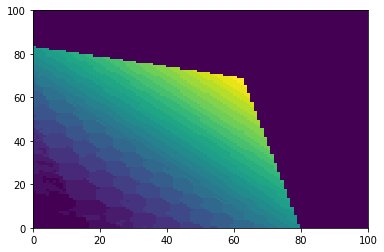

In [35]:
import numpy as np
dat1 = np.load(data_files[0])

import matplotlib.pyplot as plt
%matplotlib inline
N_v = 100
current_map = np.array([x['output']['current'] for x in dat1]).reshape((N_v,N_v))
state_map = proc_state(dat1,N_v)
net_charge_map = np.array([np.sum(x['output']['charge_state']) for x in dat1]).reshape((N_v,N_v))
plt.pcolor(net_charge_map)